In [17]:
# Load the data

# Code attempts to load /mnt/data/ecommerce_customer_data_custom_ratios.csv.

# If the CSV is missing, it creates a small synthetic sample (so you can see the full pipeline run).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [18]:
df = pd.read_csv("../../data/ecommerce_customer_data_custom_ratios.csv", header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250001 entries, 0 to 250000
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       250001 non-null  object
 1   1       250001 non-null  object
 2   2       250001 non-null  object
 3   3       250001 non-null  object
 4   4       250001 non-null  object
 5   5       250001 non-null  object
 6   6       250001 non-null  object
 7   7       250001 non-null  object
 8   8       202405 non-null  object
 9   9       250001 non-null  object
 10  10      250001 non-null  object
 11  11      250001 non-null  object
 12  12      250001 non-null  object
dtypes: object(13)
memory usage: 24.8+ MB


/var/folders/51/c247q47s2d38qy58zlgccks00000gn/T/ipykernel_26035/3710043721.py:1: DtypeWarning: Columns (0,3,4,5,7,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/ecommerce_customer_data_custom_ratios.csv", header=None)


In [19]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8     47596
9         0
10        0
11        0
12        0
dtype: int64

In [ ]:
df.columns = [
    "Customer ID",
    "Purchase Date",
    "Product Category",
    "Product Price",
    "Quantity",
    "Total Purchase Amount",
    "Payment Method",
    "Customer Age",
    "Returns",
    "Customer Name",
    "Age",
    "Gender",
    "Churn",
]

In [21]:
df.dtypes

Customer ID              object
Purchase Date            object
Product Category         object
Product Price            object
Quantity                 object
Total Purchase Amount    object
Payment Method           object
Customer Age             object
Returns                  object
Customer Name            object
Age                      object
Gender                   object
Churn                    object
dtype: object

In [22]:
# Convert numeric columns to proper numeric types
num_cols = [
    "Product Price",
    "Quantity",
    "Total Purchase Amount",
    "Customer Age",
    "Age",
    "Returns",
    "Churn",
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Convert Purchase Date to datetime
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], errors="coerce")

/var/folders/51/c247q47s2d38qy58zlgccks00000gn/T/ipykernel_26035/1572481432.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Purchase Date"] = pd.to_datetime(df["Purchase Date"], errors="coerce")


In [23]:
# Missing values handling:
df["Returns"].fillna(0, inplace=True)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

/var/folders/51/c247q47s2d38qy58zlgccks00000gn/T/ipykernel_26035/3736037960.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Returns"].fillna(0, inplace=True)


In [24]:
# Feature Engineering
df["Purchase_Year"] = df["Purchase Date"].dt.year
df["Purchase_Month"] = df["Purchase Date"].dt.month
df["Purchase_Day"] = df["Purchase Date"].dt.day
df["Purchase_Hour"] = df["Purchase Date"].dt.hour

# Drop original date column if not needed
df.drop(columns=["Purchase Date"], inplace=True)

In [25]:
# Drop identifiers that leak info
df.drop(columns=["Customer ID", "Customer Name"], inplace=True)

In [ ]:
df.dtypes

Product Category          object
Product Price            float64
Quantity                 float64
Total Purchase Amount    float64
Payment Method            object
Customer Age             float64
Returns                  float64
Age                      float64
Gender                    object
Churn                    float64
Purchase_Year            float64
Purchase_Month           float64
Purchase_Day             float64
Purchase_Hour            float64
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["Product Category", "Payment Method", "Gender"]

# Initialize label encoders for each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df.isna().sum()

Product Price            0
Quantity                 0
Total Purchase Amount    0
Customer Age             0
Returns                  0
Age                      0
Churn                    0
Purchase_Year            1
Purchase_Month           1
Purchase_Day             1
Purchase_Hour            1
Product Category_1       0
Product Category_2       0
Product Category_3       0
Product Category_4       0
Payment Method_1         0
Payment Method_2         0
Payment Method_3         0
Payment Method_4         0
Gender_1                 0
Gender_2                 0
dtype: int64

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [31]:
df.isna().sum()

Product Price            0
Quantity                 0
Total Purchase Amount    0
Customer Age             0
Returns                  0
Age                      0
Churn                    0
Purchase_Year            0
Purchase_Month           0
Purchase_Day             0
Purchase_Hour            0
Product Category_1       0
Product Category_2       0
Product Category_3       0
Product Category_4       0
Payment Method_1         0
Payment Method_2         0
Payment Method_3         0
Payment Method_4         0
Gender_1                 0
Gender_2                 0
dtype: int64

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Decision Tree Accuracy: 0.8003839923201536
[[40018     8]
 [ 9973     2]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     40026
         1.0       0.20      0.00      0.00      9975

    accuracy                           0.80     50001
   macro avg       0.50      0.50      0.44     50001
weighted avg       0.68      0.80      0.71     50001

Random Forest Accuracy: 0.8005039899202016
[[40026     0]
 [ 9975     0]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     40026
         1.0       0.00      0.00      0.00      9975

    accuracy                           0.80     50001
   macro avg       0.40      0.50      0.44     50001
weighted avg       0.64      0.80      0.71     50001



/Users/asadkhan/workspace/depaul-ml/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/asadkhan/workspace/depaul-ml/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/asadkhan/workspace/depaul-ml/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

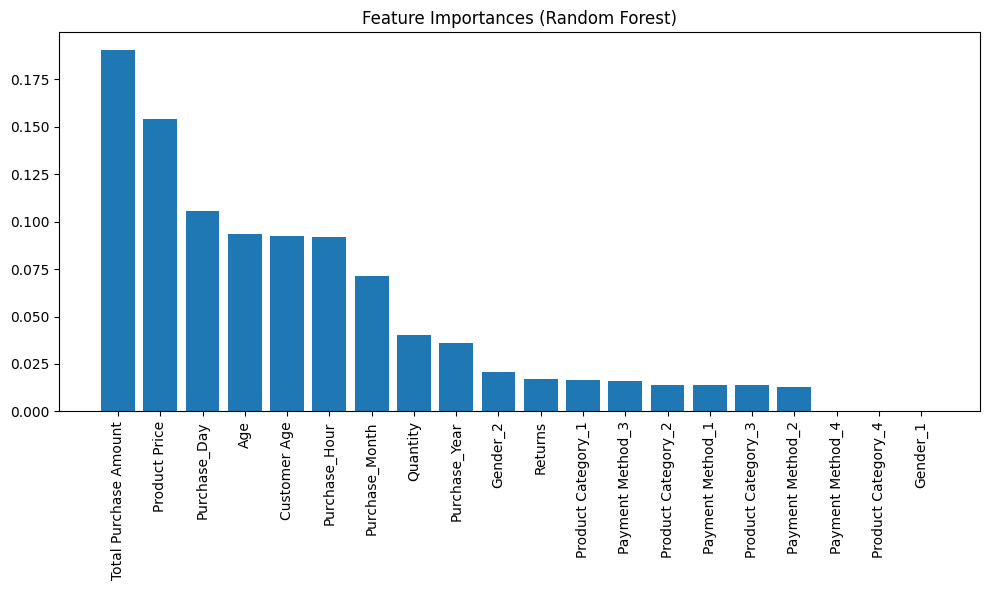

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [39]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_depth": [6, 8, 10, None],
#     "min_samples_split": [2, 5, 10],
# }

# grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy")
# grid.fit(X_train, y_train)
# print(grid.best_params_)

In [ ]:
# FASTER GRID SEARCH FOR MY MACBOOK:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
}

# Optional: use a smaller subset for tuning
X_sample = X_train.sample(50000, random_state=42)
y_sample = y_train.loc[X_sample.index]

rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2,
    random_state=42,
)

rand_search.fit(X_sample, y_sample)
print(rand_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .max_depth=8, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END .max_depth=8, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END .max_depth=8, min_samples_split=5, n_estimators=200; total time=   4.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   7.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   7.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   7.4s
[CV] END max_depth=8, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.6s
[CV] END max_depth=8, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END max_depth=10, min_samples_spli

In [46]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1,
    # BECAUSE DATA IS HEAVILY UNBALANCED
    class_weight="balanced",
)

best_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,8
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5874682506349873
              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71     40026
         1.0       0.21      0.38      0.27      9975

    accuracy                           0.59     50001
   macro avg       0.51      0.51      0.49     50001
weighted avg       0.69      0.59      0.62     50001



In [48]:
y_train.value_counts(normalize=True)

Churn
0.0    0.800505
1.0    0.199495
Name: proportion, dtype: float64

In [ ]:
# # TUNE f1
# rand_search = RandomizedSearchCV(
#     rf,
#     param_distributions=param_dist,
#     n_iter=10,
#     cv=3,
#     scoring="f1",  # or "roc_auc"
#     n_jobs=-1,
#     verbose=2,
#     random_state=42,
# )

In [ ]:
# y_prob = best_rf.predict_proba(X_test)[:, 1]
# y_pred_new = (y_prob >= 0.3).astype(int)  # adjust threshold